# SWMAL Exercise

## Generalization Error

In this exercise we are going to explain important overall concepts in training. 

First we look Figure 5.3 from Deep Learning (Ian Goodfellow, et. al. [DL]).

<img src="https://itundervisning.ase.au.dk/SWMAL/L08/Figs/dl_generalization_error.png" alt="WARNING: could not get image from server." style="height:500px">

The figure shows the typical relationship between the error and the capacity, where the test error and generelization error behave differently.The left side of the plot shows the underfitting regime where both errors are very high. Following an increase in capacity the training error gets lower. Meanwhile the gap between the training error and the generalization error gets increased. and then we are in the overfitting regime. Then the capacity is too large.  

### Qa) On Generalization Error

Explanation of concepts in the figure above:

#### Training error
The training error is the blue line in graph and describes the error in relation to the capacity of the training model as a percentage. The training error indicates how well the model understands patterns in the training data, where a low training error indicates that the model has a good understanding of the training data.

#### Generalization error
The green line on the graph is the generalization error and describes the error in the training model when it is tested on new data. The generalization error indicates how well the model can predict new data, where a low generalization error indicates that the model can predict new data well.

#### Underfitting
When the capacity of the model is too low, the model will not be able to understand the patterns in the training data. This will result in a high training error and a high generalization error. This is called underfitting and can be corrected by increasing the capacity of the model.

#### Overfitting
When the capacity of the model is too high, the model will be able to understand the patterns in the training data very well. This will result in a low training error and a high generalization error. This is called overfitting and can be corrected by decreasing the capacity of the model.

#### Generalization gap
The generalization gap is the vertical difference between the training error and the generalization error. The generalization gap is high when the model is overfitting and low when the model is underfitting.

#### Optimal capacity 
When fitting the model we want to find the optimal capacity where the model can recoqnize patterns in the training set that can be used on new data but without being too specific and picking up noise in the training data. This is the point where the generalization error is lowest.


### Qb A MSE-Epoch/Error Plot

Now we are taking a look at the SGD model for fitting polynomial, that is _polynomial regression_ which is similar to the Géron one, described in [HOML] ("Polynomial Regression" + "Learning Curves"). 

#### Part 1
So as we've seen before there is a function for GenerateData that seed random data points for and also adds some noise. Then the data is split into the training and validation sets.

In the pipeline we again use the polynominial feature but with a 90 degree, and no bias in order to get a model with very high capacity. The second preprocessor is the standard scaler which standardizes the features in our data set. By removing the mean and centerring the feautre distribution around 0 and scaling the variance to 1.

lastly the poly_scaler is transformed into the training and validation sets.

X_train.shape= (25, 1)
X_val  .shape= (25, 1)
y_train.shape= (25,)
y_val  .shape= (25,)


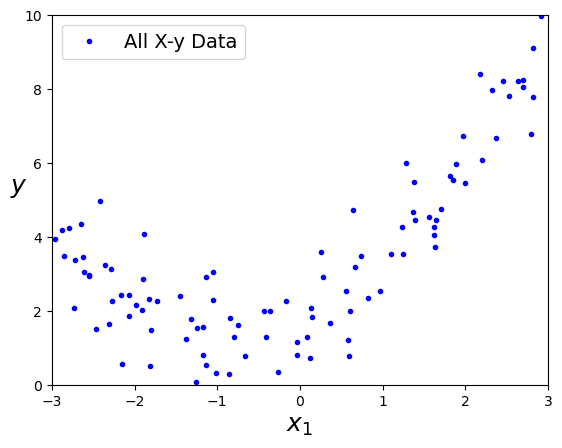

OK


In [22]:
# Run code: Qb(part I)
# NOTE: modified code from [GITHOML], 04_training_linear_models.ipynb

%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

np.random.seed(42)

def GenerateData():
    m = 100
    X = 6 * np.random.rand(m, 1) - 3
    y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)
    return X, y

X, y = GenerateData()
X_train, X_val, y_train, y_val = \
    train_test_split( \
        X[:50], y[:50].ravel(), \
        test_size=0.5, \
        random_state=10)

print("X_train.shape=",X_train.shape)
print("X_val  .shape=",X_val.shape)
print("y_train.shape=",y_train.shape)
print("y_val  .shape=",y_val.shape)

poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler()),
    ])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled   = poly_scaler.transform(X_val)

X_new=np.linspace(-3, 3, 100).reshape(100, 1)
plt.plot(X, y, "b.", label="All X-y Data")
plt.xlabel("$x_1$", fontsize=18, )
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

print('OK')      

#### Part 2

First thing is a function Train with the parameters X_train, y_train, X_val, y_val, n_epochs and verbose. The function is used to train the model and return the training and validation errors. The errors are saved in arrays. 
The Train function then uses the SGDRegressor to fit the model to the training data. It runs for 1 iteration with constant as the learning rate.
 
The model is then used to predict the training and validation sets.
The mean squared error is then calculated for both the training and validation sets. 
The errors are then saved in the arrays train_errors and val_errors. 
The function then returns the errors arrays.


In [23]:
# Run code: Qb(part II)

def Train(X_train, y_train, X_val, y_val, n_epochs, verbose=False):
    print("Training...n_epochs=",n_epochs)
    
    train_errors, val_errors = [], []
    
    sgd_reg = SGDRegressor(max_iter=1,
                           penalty=None,
                           eta0=0.0005,
                           warm_start=True,
                           early_stopping=False,
                           learning_rate="constant",
                           # Had to change this to 0 instead of "inf" to fix the error 
                           tol=-float(0), 
                           random_state=42)

    for epoch in range(n_epochs):
        
        sgd_reg.fit(X_train, y_train)
        
        y_train_predict = sgd_reg.predict(X_train)
        y_val_predict   = sgd_reg.predict(X_val)

        mse_train=mean_squared_error(y_train, y_train_predict)
        mse_val  =mean_squared_error(y_val  , y_val_predict)

        train_errors.append(mse_train)
        val_errors  .append(mse_val)
        if verbose:
            print(f"  epoch={epoch:4d}, mse_train={mse_train:4.2f}, mse_val={mse_val:4.2f}")

    return train_errors, val_errors

n_epochs = 500
train_errors, val_errors = Train(X_train_poly_scaled, y_train, X_val_poly_scaled, y_val, n_epochs, True)

print('OK')

Training...n_epochs= 500
  epoch=   0, mse_train=11.85, mse_val=14.58
  epoch=   1, mse_train=11.51, mse_val=14.10
  epoch=   2, mse_train=11.15, mse_val=13.60
  epoch=   3, mse_train=10.81, mse_val=13.13
  epoch=   4, mse_train=10.49, mse_val=12.70
  epoch=   5, mse_train=10.18, mse_val=12.30
  epoch=   6, mse_train=9.88, mse_val=11.92
  epoch=   7, mse_train=9.60, mse_val=11.56
  epoch=   8, mse_train=9.33, mse_val=11.23
  epoch=   9, mse_train=9.07, mse_val=10.91
  epoch=  10, mse_train=8.82, mse_val=10.62
  epoch=  11, mse_train=8.59, mse_val=10.34
  epoch=  12, mse_train=8.36, mse_val=10.07
  epoch=  13, mse_train=8.14, mse_val=9.82
  epoch=  14, mse_train=7.93, mse_val=9.57
  epoch=  15, mse_train=7.72, mse_val=9.34
  epoch=  16, mse_train=7.53, mse_val=9.12
  epoch=  17, mse_train=7.34, mse_val=8.91
  epoch=  18, mse_train=7.16, mse_val=8.71
  epoch=  19, mse_train=6.98, mse_val=8.52
  epoch=  20, mse_train=6.81, mse_val=8.33
  epoch=  21, mse_train=6.65, mse_val=8.15
  epoch=  

C:\Users\msldk\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\msldk\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\msldk\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\msldk\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\msldk\anaconda3\Lib\site-packages\sklearn\linea

  epoch= 109, mse_train=1.42, mse_val=2.26
  epoch= 110, mse_train=1.40, mse_val=2.24
  epoch= 111, mse_train=1.38, mse_val=2.22
  epoch= 112, mse_train=1.37, mse_val=2.20
  epoch= 113, mse_train=1.35, mse_val=2.18
  epoch= 114, mse_train=1.34, mse_val=2.16
  epoch= 115, mse_train=1.32, mse_val=2.14
  epoch= 116, mse_train=1.31, mse_val=2.12
  epoch= 117, mse_train=1.30, mse_val=2.10
  epoch= 118, mse_train=1.28, mse_val=2.08
  epoch= 119, mse_train=1.27, mse_val=2.06
  epoch= 120, mse_train=1.26, mse_val=2.05
  epoch= 121, mse_train=1.24, mse_val=2.03
  epoch= 122, mse_train=1.23, mse_val=2.01
  epoch= 123, mse_train=1.22, mse_val=2.00
  epoch= 124, mse_train=1.21, mse_val=1.98
  epoch= 125, mse_train=1.19, mse_val=1.97
  epoch= 126, mse_train=1.18, mse_val=1.95


C:\Users\msldk\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\msldk\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\msldk\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\msldk\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\msldk\anaconda3\Lib\site-packages\sklearn\linea

  epoch= 127, mse_train=1.17, mse_val=1.94
  epoch= 128, mse_train=1.16, mse_val=1.92
  epoch= 129, mse_train=1.15, mse_val=1.91
  epoch= 130, mse_train=1.14, mse_val=1.89
  epoch= 131, mse_train=1.13, mse_val=1.88
  epoch= 132, mse_train=1.12, mse_val=1.87
  epoch= 133, mse_train=1.11, mse_val=1.85
  epoch= 134, mse_train=1.10, mse_val=1.84
  epoch= 135, mse_train=1.09, mse_val=1.83
  epoch= 136, mse_train=1.08, mse_val=1.81
  epoch= 137, mse_train=1.07, mse_val=1.80
  epoch= 138, mse_train=1.06, mse_val=1.79
  epoch= 139, mse_train=1.06, mse_val=1.78
  epoch= 140, mse_train=1.05, mse_val=1.77
  epoch= 141, mse_train=1.04, mse_val=1.76
  epoch= 142, mse_train=1.03, mse_val=1.74
  epoch= 143, mse_train=1.02, mse_val=1.73
  epoch= 144, mse_train=1.02, mse_val=1.72
  epoch= 145, mse_train=1.01, mse_val=1.71
  epoch= 146, mse_train=1.00, mse_val=1.70
  epoch= 147, mse_train=0.99, mse_val=1.69
  epoch= 148, mse_train=0.99, mse_val=1.68
  epoch= 149, mse_train=0.98, mse_val=1.67
  epoch= 15

C:\Users\msldk\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\msldk\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\msldk\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\msldk\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\msldk\anaconda3\Lib\site-packages\sklearn\linea

  epoch= 244, mse_train=0.67, mse_val=1.35
  epoch= 245, mse_train=0.67, mse_val=1.35
  epoch= 246, mse_train=0.67, mse_val=1.35
  epoch= 247, mse_train=0.67, mse_val=1.35
  epoch= 248, mse_train=0.67, mse_val=1.35
  epoch= 249, mse_train=0.67, mse_val=1.35
  epoch= 250, mse_train=0.66, mse_val=1.35
  epoch= 251, mse_train=0.66, mse_val=1.35
  epoch= 252, mse_train=0.66, mse_val=1.35
  epoch= 253, mse_train=0.66, mse_val=1.36
  epoch= 254, mse_train=0.66, mse_val=1.36
  epoch= 255, mse_train=0.66, mse_val=1.36
  epoch= 256, mse_train=0.66, mse_val=1.36
  epoch= 257, mse_train=0.66, mse_val=1.36
  epoch= 258, mse_train=0.65, mse_val=1.36
  epoch= 259, mse_train=0.65, mse_val=1.36
  epoch= 260, mse_train=0.65, mse_val=1.36
  epoch= 261, mse_train=0.65, mse_val=1.36
  epoch= 262, mse_train=0.65, mse_val=1.36
  epoch= 263, mse_train=0.65, mse_val=1.36
  epoch= 264, mse_train=0.65, mse_val=1.36
  epoch= 265, mse_train=0.65, mse_val=1.37
  epoch= 266, mse_train=0.65, mse_val=1.37
  epoch= 26

C:\Users\msldk\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\msldk\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\msldk\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\msldk\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\msldk\anaconda3\Lib\site-packages\sklearn\linea


  epoch= 374, mse_train=0.57, mse_val=1.61
  epoch= 375, mse_train=0.57, mse_val=1.61
  epoch= 376, mse_train=0.57, mse_val=1.61
  epoch= 377, mse_train=0.57, mse_val=1.62
  epoch= 378, mse_train=0.57, mse_val=1.62
  epoch= 379, mse_train=0.57, mse_val=1.62
  epoch= 380, mse_train=0.57, mse_val=1.63
  epoch= 381, mse_train=0.57, mse_val=1.63
  epoch= 382, mse_train=0.57, mse_val=1.63
  epoch= 383, mse_train=0.57, mse_val=1.64
  epoch= 384, mse_train=0.57, mse_val=1.64
  epoch= 385, mse_train=0.57, mse_val=1.64
  epoch= 386, mse_train=0.57, mse_val=1.64
  epoch= 387, mse_train=0.57, mse_val=1.65
  epoch= 388, mse_train=0.57, mse_val=1.65
  epoch= 389, mse_train=0.57, mse_val=1.65
  epoch= 390, mse_train=0.57, mse_val=1.66
  epoch= 391, mse_train=0.57, mse_val=1.66
  epoch= 392, mse_train=0.57, mse_val=1.66
  epoch= 393, mse_train=0.57, mse_val=1.67
  epoch= 394, mse_train=0.57, mse_val=1.67
  epoch= 395, mse_train=0.56, mse_val=1.67
  epoch= 396, mse_train=0.56, mse_val=1.67
  epoch= 3

C:\Users\msldk\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\msldk\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\msldk\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\msldk\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\msldk\anaconda3\Lib\site-packages\sklearn\linea

#### Part 3

The code below is used to plot the training and validation errors. Here we can see which model is the best and this is also indicated with an annotation on the graph. This is when the RMSE is the lowest near the dotted horizontal line going parralel to the x-axis. this model will be the best model for new data.

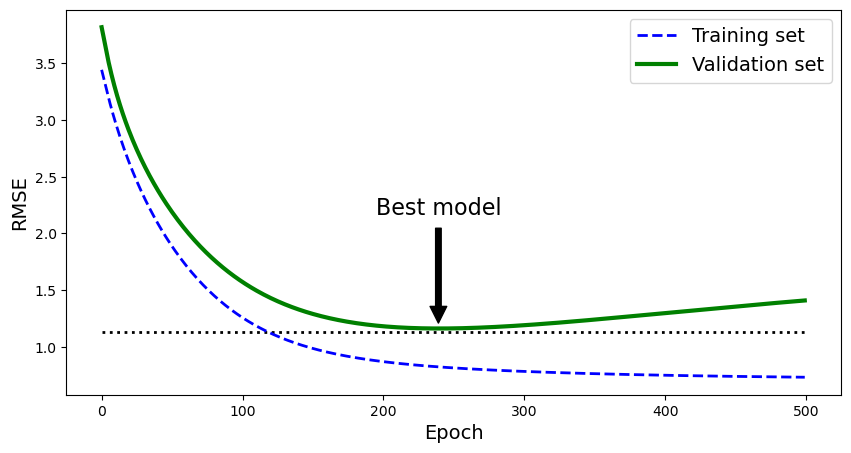

OK


In [24]:
# Run code: Qb(part III)

best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

plt.figure(figsize=(10,5))
plt.annotate('Best model',
             xy=(best_epoch, best_val_rmse),
             xytext=(best_epoch, best_val_rmse + 1),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16,
            )

best_val_rmse -= 0.03  # just to make the graph look better
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(train_errors), "b--", linewidth=2, label="Training set")
plt.plot(np.sqrt(val_errors), "g-", linewidth=3, label="Validation set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
plt.show()

print('OK')

### Qc)  Early Stopping

Now we are going to implement early stopping in the code above.
The early stopping could be implemented as a pseudo code like this:

```python
best_val_error = float("inf")
best_epoch = None

for epoch in range(n_epochs):
    ...
   
    if val_error < best_val_error:
        best_val_error = val_error
        best_epoch = epoch
    
    if val_error > best_val_error:
        printf("early stopping")
        break
``` 

Where we stop the training when the validation error ( val_error ) is higher than the best validation error ( best_val_error ).

### Qd) Explain the Polynomial RMSE-Capacity plot

#### Why does the _training error_ keep dropping, while the _CV-error_ drops until around capacity 3, and then begin to rise again?

As the model complexity increases the model becoumes more better at fitting the training data. It continues to decrease as the model adjusts to noice in the training data.

For the validation RMSE it is initially decresing as the model is learning the patterns in the training data. When the model complexity increases the model starts to overfit the training data and the validation RMSE starts to increase. This leads to the model being worse for new unseen data becuase it becomes to specific to the training data.

#### What does the x-axis _Capacity_ and y-axis _RMSE_ represent?
The x-axis with capacity represents the complexity of the model, specifilly the degree of polynominal features of the regression model. The y-axis with RMSE represents the error of the model.

#### Increasing the model capacity. What happens when you do plots for `degrees` larger than around 10? Relate this with what you found via Qa+b in `capacity_under_overfitting.ipynb`.



Iterating...degrees= range(1, 8)
  degree=   1, rmse_training=0.48, rmse_cv=0.64
  degree=   2, rmse_training=0.17, rmse_cv=0.24
  degree=   3, rmse_training=0.11, rmse_cv=0.14
  degree=   4, rmse_training=0.11, rmse_cv=0.21
  degree=   5, rmse_training=0.10, rmse_cv=0.31
  degree=   6, rmse_training=0.10, rmse_cv=0.34
  degree=   7, rmse_training=0.10, rmse_cv=0.44


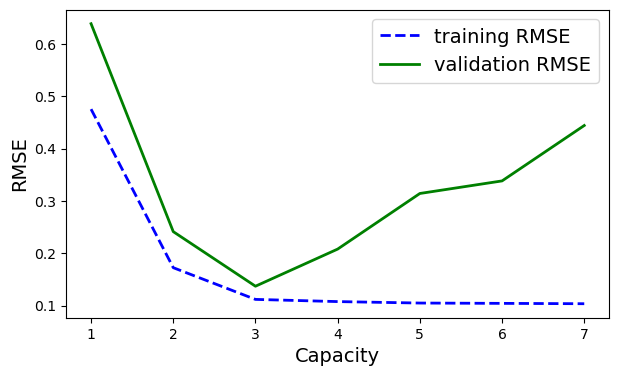

OK


In [25]:
# Run and review this code
# NOTE: modified code from [GITHOML], 04_training_linear_models.ipynb

%matplotlib inline

from math import sqrt
import numpy as np
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

def true_fun(X):
    return np.cos(1.5 * np.pi * X)

def GenerateData():
    n_samples = 30
    #degrees = [1, 4, 15]
    degrees = range(1,8)

    X = np.sort(np.random.rand(n_samples))
    y = true_fun(X) + np.random.randn(n_samples) * 0.1
    return X, y, degrees

np.random.seed(0)
X, y, degrees  = GenerateData()

print("Iterating...degrees=",degrees)
capacities, rmses_training, rmses_validation= [], [], []
for i in range(len(degrees)):
    d=degrees[i]
    
    polynomial_features = PolynomialFeatures(degree=d, include_bias=False)
    
    linear_regression = LinearRegression()
    pipeline = Pipeline([
            ("polynomial_features", polynomial_features),
            ("linear_regression", linear_regression)
        ])
    
    Z = X[:, np.newaxis]
    pipeline.fit(Z, y)
    
    p = pipeline.predict(Z)
    train_rms = mean_squared_error(y,p)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, Z, y, scoring="neg_mean_squared_error", cv=10)
    score_mean = -scores.mean()
    
    rmse_training=sqrt(train_rms)
    rmse_validation=sqrt(score_mean)
    
    print(f"  degree={d:4d}, rmse_training={rmse_training:4.2f}, rmse_cv={rmse_validation:4.2f}")
    
    capacities      .append(d)
    rmses_training  .append(rmse_training)
    rmses_validation.append(rmse_validation)
    
plt.figure(figsize=(7,4))
plt.plot(capacities, rmses_training,  "b--", linewidth=2, label="training RMSE")
plt.plot(capacities, rmses_validation,"g-",  linewidth=2, label="validation RMSE")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Capacity", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
plt.show()

print('OK')

#### Increasing the model capacity. What happens when you do plots for `degrees` larger than around 10? Relate this with what you found via Qa+b in `capacity_under_overfitting.ipynb`.


Iterating...degrees= range(1, 12)
  degree=   1, rmse_training=0.48, rmse_cv=0.64
  degree=   2, rmse_training=0.17, rmse_cv=0.24
  degree=   3, rmse_training=0.11, rmse_cv=0.14
  degree=   4, rmse_training=0.11, rmse_cv=0.21
  degree=   5, rmse_training=0.10, rmse_cv=0.31
  degree=   6, rmse_training=0.10, rmse_cv=0.34
  degree=   7, rmse_training=0.10, rmse_cv=0.44
  degree=   8, rmse_training=0.10, rmse_cv=0.60
  degree=   9, rmse_training=0.10, rmse_cv=4.61
  degree=  10, rmse_training=0.10, rmse_cv=38.94
  degree=  11, rmse_training=0.10, rmse_cv=154.97


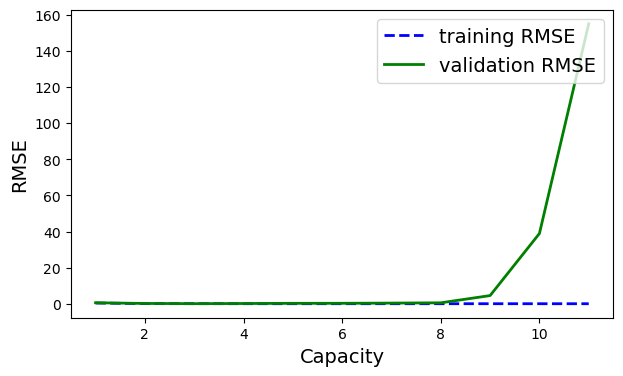

OK


In [26]:
# Run and review this code
# NOTE: modified code from [GITHOML], 04_training_linear_models.ipynb

%matplotlib inline

from math import sqrt
import numpy as np
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

def true_fun(X):
    return np.cos(1.5 * np.pi * X)

def GenerateData():
    n_samples = 30
    #degrees = [1, 4, 15]
    degrees = range(1,12)

    X = np.sort(np.random.rand(n_samples))
    y = true_fun(X) + np.random.randn(n_samples) * 0.1
    return X, y, degrees

np.random.seed(0)
X, y, degrees  = GenerateData()

print("Iterating...degrees=",degrees)
capacities, rmses_training, rmses_validation= [], [], []
for i in range(len(degrees)):
    d=degrees[i]
    
    polynomial_features = PolynomialFeatures(degree=d, include_bias=False)
    
    linear_regression = LinearRegression()
    pipeline = Pipeline([
            ("polynomial_features", polynomial_features),
            ("linear_regression", linear_regression)
        ])
    
    Z = X[:, np.newaxis]
    pipeline.fit(Z, y)
    
    p = pipeline.predict(Z)
    train_rms = mean_squared_error(y,p)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, Z, y, scoring="neg_mean_squared_error", cv=10)
    score_mean = -scores.mean()
    
    rmse_training=sqrt(train_rms)
    rmse_validation=sqrt(score_mean)
    
    print(f"  degree={d:4d}, rmse_training={rmse_training:4.2f}, rmse_cv={rmse_validation:4.2f}")
    
    capacities      .append(d)
    rmses_training  .append(rmse_training)
    rmses_validation.append(rmse_validation)
    
plt.figure(figsize=(7,4))
plt.plot(capacities, rmses_training,  "b--", linewidth=2, label="training RMSE")
plt.plot(capacities, rmses_validation,"g-",  linewidth=2, label="validation RMSE")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Capacity", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
plt.show()

print('OK')

After increacing the capacity we now see that the RMSE of the validation goes exponetial and at 10 capacity it is grown very much. This is because the model is overfitting the training data and is not able to predict new data. This is also what we found in Qa+b in `capacity_under_overfitting.ipynb` where we saw that the model was overfitting the training data and was not able to predict new data when degress was too high.